In [96]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
import plotly.express as px

In [97]:
import nltk
from nltk.corpus import stopwords
from textblob import Word
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from keras.preprocessing.text import Tokenizer
import re

In [98]:
d1 = pd.read_csv("GooglePayIndia.csv")
d2 = pd.read_csv("PaytmIndia.csv")
d3 = pd.read_csv("PhonePayIndia.csv")

In [99]:
d1['app']='GooglePayIndia'
d2['app']='PaytmIndia'
d3['app']='PhonePayIndia'

In [100]:
df = pd.concat([d1, d2, d3])


In [101]:
df

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,app
0,0,gp:AOqpTOEdT_VactGi_J9Q2PEWY7J4XlD7BINhOj9xwOr...,Len Pagnam,https://play-lh.googleusercontent.com/a-/AOh14...,How do add a boarding pass? I see no passes tab.,1,0,2.137.401329300,2021-11-18 17:03:06,Hi Len. Could you try the steps in this guide ...,2021-11-18 17:27:11,GooglePayIndia
1,1,gp:AOqpTOHltpCzXurPoFUgj-a3L-wApC93-fTvocbF9K7...,Benjamin Silva,https://play-lh.googleusercontent.com/a/AATXAJ...,Best,5,0,2.134.392709498,2021-11-18 16:43:34,NaN,NaN,GooglePayIndia
2,2,gp:AOqpTOGTiyxy_FWSQe7eCONa7PsIP6v7cS-xWCL6jFF...,PARVESH MIAR,https://play-lh.googleusercontent.com/a-/AOh14...,All ok,5,0,2.138.406141160,2021-11-18 16:12:42,NaN,NaN,GooglePayIndia
3,3,gp:AOqpTOHllyGnmLGZqPUGokxYncq9kOKoY3Zz_4ZF6b0...,Mikko L.,https://play-lh.googleusercontent.com/a-/AOh14...,"Rasy to use really... But there never, ever sh...",3,0,2.138.406141160,2021-11-18 16:06:35,NaN,NaN,GooglePayIndia
4,4,gp:AOqpTOHjnJ6gAF4NzruhLDGVszAaTKSerVeKt-UtJfM...,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,I still do not understand why your restricting...,3,251,2.134.392709498,2021-11-18 15:48:08,NaN,NaN,GooglePayIndia
...,...,...,...,...,...,...,...,...,...,...,...,...
11736,11736,gp:AOqpTOEI3U9pLM_RUp8LcwRgbDyaImBZQlgPh1lhVUA...,Ashok Pawar,https://play-lh.googleusercontent.com/a-/AOh14...,good,5,0,4.1.25,2021-11-10 15:27:29,NaN,NaN,PhonePayIndia
11737,11737,gp:AOqpTOFuSV_9Lt31JbHaR000CauJbntWPTdISIwneYE...,Tabish Khan,https://play-lh.googleusercontent.com/a-/AOh14...,Simply awesome 😎,5,0,4.1.25,2021-11-10 15:27:27,NaN,NaN,PhonePayIndia
11738,11738,gp:AOqpTOEdjlMnAP0bMX4oKZ2eOEUtZvfJjzGjsljWCKK...,Kiran Shinde Patil,https://play-lh.googleusercontent.com/a-/AOh14...,Super,1,0,4.1.25,2021-11-10 15:26:55,"Thank you for the feedback, Kiran. We work har...",2021-11-10 15:40:13,PhonePayIndia
11739,11739,gp:AOqpTOH6bRKH7nM-B6306EUk-mSMrKejmGMyDm2u-iK...,The Indian,https://play-lh.googleusercontent.com/a-/AOh14...,Excellent,5,0,4.1.18,2021-11-10 15:23:32,NaN,NaN,PhonePayIndia


In [102]:
data = df.drop(['Unnamed: 0','reviewId','userImage','reviewCreatedVersion','replyContent','repliedAt'],axis=1)

In [103]:
data

,userName,content,score,thumbsUpCount,at,app
0,Len Pagnam,How do add a boarding pass? I see no passes tab.,1,0,2021-11-18 17:03:06,GooglePayIndia
1,Benjamin Silva,Best,5,0,2021-11-18 16:43:34,GooglePayIndia
2,PARVESH MIAR,All ok,5,0,2021-11-18 16:12:42,GooglePayIndia
3,Mikko L.,"Rasy to use really... But there never, ever sh...",3,0,2021-11-18 16:06:35,GooglePayIndia
4,A Google user,I still do not understand why your restricting...,3,251,2021-11-18 15:48:08,GooglePayIndia
...,...,...,...,...,...,...
11736,Ashok Pawar,good,5,0,2021-11-10 15:27:29,PhonePayIndia
11737,Tabish Khan,Simply awesome 😎,5,0,2021-11-10 15:27:27,PhonePayIndia
11738,Kiran Shinde Patil,Super,1,0,2021-11-10 15:26:55,PhonePayIndia
11739,The Indian,Excellent,5,0,2021-11-10 15:23:32,PhonePayIndia


In [104]:
data = data[data["content"].notna()]
data = data[data["userName"].notna()]
data.shape

(183868, 6)

In [105]:
import nltk 
nltk.download('wordnet')
stop_words = stopwords.words("english")
data.loc[:, "content"] = data.loc[:, "content"].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))
data.loc[:, "content"] = data.loc[:, "content"].apply(lambda x: " ".join(Word(x).lemmatize() for x in x.split()))
data.loc[:, "content"] = data.loc[:, "content"].apply(lambda x: x.encode('ascii', 'ignore').decode('ascii'))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [106]:
data

,userName,content,score,thumbsUpCount,at,app
0,Len Pagnam,How add boarding pass? I see pass tab.,1,0,2021-11-18 17:03:06,GooglePayIndia
1,Benjamin Silva,Best,5,0,2021-11-18 16:43:34,GooglePayIndia
2,PARVESH MIAR,All ok,5,0,2021-11-18 16:12:42,GooglePayIndia
3,Mikko L.,"Rasy use really... But never, ever ""bad-data"" ...",3,0,2021-11-18 16:06:35,GooglePayIndia
4,A Google user,I still understand restricting certain legal a...,3,251,2021-11-18 15:48:08,GooglePayIndia
...,...,...,...,...,...,...
11736,Ashok Pawar,good,5,0,2021-11-10 15:27:29,PhonePayIndia
11737,Tabish Khan,Simply awesome,5,0,2021-11-10 15:27:27,PhonePayIndia
11738,Kiran Shinde Patil,Super,1,0,2021-11-10 15:26:55,PhonePayIndia
11739,The Indian,Excellent,5,0,2021-11-10 15:23:32,PhonePayIndia


In [107]:
data.loc[:,'content'] = data.loc[:,'content'].str.replace('?','',regex=True)
data.loc[:,'content'] = data.loc[:,'content'].str.replace('!','',regex=True)
data.loc[:,'content'] = data.loc[:,'content'].str.replace('@','',regex=True)
data.loc[:,'content'] = data.loc[:,'content'].str.replace('*','',regex=True)
data.loc[:,'content'] = data.loc[:,'content'].str.replace('&','',regex=True)
data.loc[:,'content'] = data.loc[:,'content'].str.replace(':','',regex=True)
data.loc[:,'content'] = data.loc[:,'content'].str.replace('.','',regex=True)
data.loc[:,'content'] = data.loc[:,'content'].str.replace('-','',regex=True)
data.loc[:,'content'] = data.loc[:,'content'].str.replace('%','',regex=True)
data.loc[:,'content'] = data.loc[:,'content'].str.replace('$','',regex=True)
data.loc[:,'content'] = data.loc[:,'content'].str.replace(',','',regex=True)

In [108]:
data.loc[:,'content'] = data.loc[:,'content'].str.replace('app','',regex=True)
data.loc[:,'content'] = data.loc[:,'content'].str.replace('paytm','',regex=True)
data.loc[:,'content'] = data.loc[:,'content'].str.replace('google','',regex=True)

In [109]:
data

,userName,content,score,thumbsUpCount,at,app
0,Len Pagnam,How add boarding pass I see pass tab,1,0,2021-11-18 17:03:06,GooglePayIndia
1,Benjamin Silva,Best,5,0,2021-11-18 16:43:34,GooglePayIndia
2,PARVESH MIAR,All ok,5,0,2021-11-18 16:12:42,GooglePayIndia
3,Mikko L.,"Rasy use really But never ever ""baddata"" among...",3,0,2021-11-18 16:06:35,GooglePayIndia
4,A Google user,I still understand restricting certain legal a...,3,251,2021-11-18 15:48:08,GooglePayIndia
...,...,...,...,...,...,...
11736,Ashok Pawar,good,5,0,2021-11-10 15:27:29,PhonePayIndia
11737,Tabish Khan,Simply awesome,5,0,2021-11-10 15:27:27,PhonePayIndia
11738,Kiran Shinde Patil,Super,1,0,2021-11-10 15:26:55,PhonePayIndia
11739,The Indian,Excellent,5,0,2021-11-10 15:23:32,PhonePayIndia


In [110]:
data5 = data[data['score']==5]
corp = data5['content'].values
tok = Tokenizer(num_words=250, split=' ')
tok.fit_on_texts(data5['content'].values)

P = []
CNT = []
N = []
CNT1 =[]

In [111]:
data5

,userName,content,score,thumbsUpCount,at,app
1,Benjamin Silva,Best,5,0,2021-11-18 16:43:34,GooglePayIndia
2,PARVESH MIAR,All ok,5,0,2021-11-18 16:12:42,GooglePayIndia
7,Robin Cramp,App working expected Google Pay smart watch (f...,5,11,2021-11-18 14:05:44,GooglePayIndia
8,Matthew Chandler,Good,5,0,2021-11-18 13:38:21,GooglePayIndia
10,Andrei Vacareanu,Ok,5,0,2021-11-18 13:01:58,GooglePayIndia
...,...,...,...,...,...,...
11733,Venkata Rao Gundapu,Excellent,5,0,2021-11-10 15:28:48,PhonePayIndia
11734,Mb Raj,Very nice,5,0,2021-11-10 15:28:12,PhonePayIndia
11736,Ashok Pawar,good,5,0,2021-11-10 15:27:29,PhonePayIndia
11737,Tabish Khan,Simply awesome,5,0,2021-11-10 15:27:27,PhonePayIndia


In [112]:
for i in range(1,15):
    P.append(tok.index_word[i])

In [113]:
P

['good',
 'nice',
 'very',
 'i',
 'best',
 'easy',
 'super',
 'excellent',
 'use',
 'great',
 'payment',
 'fast',
 'love',
 'service']

In [114]:
for word in P:
    CNT.append(tok.word_counts[word])

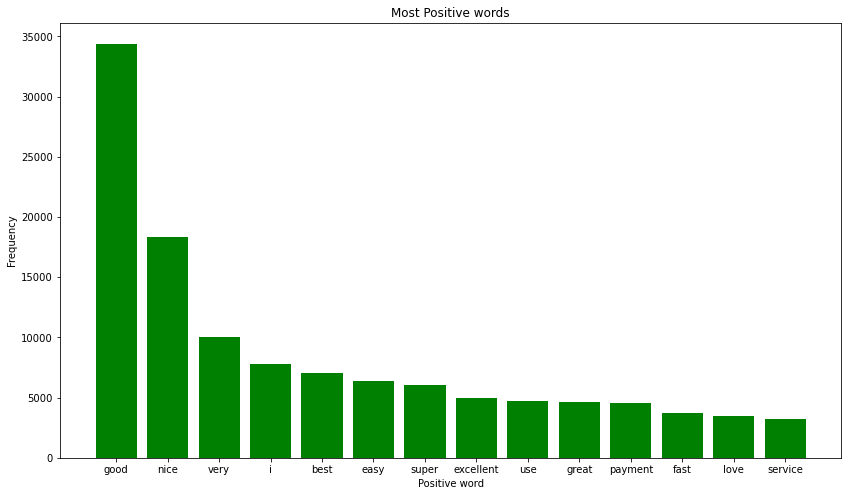

In [115]:
plt.figure(figsize=(14,8))
plt.bar(P,CNT,color='green')
plt.title('Most Positive words')
plt.xlabel('Positive word')
plt.ylabel('Frequency')
plt.show()

In [116]:
'''plt.figure(figsize=(14,8))
plt.bar(P,CNT,color='green')
plt.title('Most Positive words')
plt.xlabel('Positive word')
plt.ylabel('Frequency')
plt.show()'''
import plotly.express as dx
dx.bar(x=P, y=CNT,labels={
    "x":"Positive Word",
    "y":"Count"},
    title="Positive Words Count")

In [117]:
data1 = data[(data['score']==1)]
corp1 = data1['content'].values
tokn = Tokenizer(num_words=250, split=' ')
tokn.fit_on_texts(data1['content'].values)
for n in range(1,15):
    N.append(tokn.index_word[n])

for word in N:
    CNT1.append(tokn.word_counts[word])

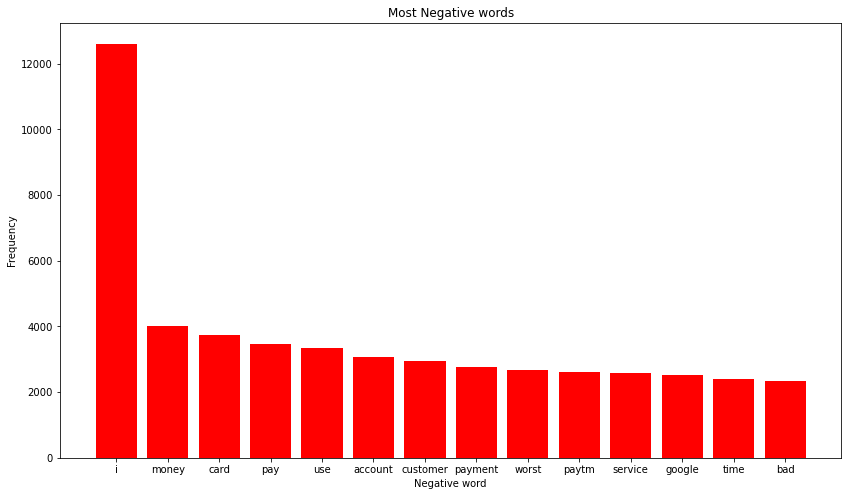

In [118]:
plt.figure(figsize=(14,8))
plt.bar(N,CNT1,color='red')
plt.title('Most Negative words')
plt.xlabel('Negative word')
plt.ylabel('Frequency')
plt.show()

In [119]:
dx.bar(x=N, y=CNT1,labels={
    "x":"Positive Word",
    "y":"Count"},
    title="Negative Words Count")

In [120]:
data["New_date"] = pd.to_datetime(data['at'], format="%Y-%m-%d %H:%M:%S")

In [121]:
data['Month'] = data['New_date'].dt.month_name()
data['Year'] = data['New_date'].dt.year
data['date'] = data['New_date'].dt.day
data['hour'] = data['New_date'].dt.hour
data['Minutes'] = data['New_date'].dt.minute
data['Seconds'] = data['New_date'].dt.second


In [122]:
data

,userName,content,score,thumbsUpCount,at,app,New_date,Month,Year,date,hour,Minutes,Seconds
0,Len Pagnam,How add boarding pass I see pass tab,1,0,2021-11-18 17:03:06,GooglePayIndia,2021-11-18 17:03:06,November,2021,18,17,3,6
1,Benjamin Silva,Best,5,0,2021-11-18 16:43:34,GooglePayIndia,2021-11-18 16:43:34,November,2021,18,16,43,34
2,PARVESH MIAR,All ok,5,0,2021-11-18 16:12:42,GooglePayIndia,2021-11-18 16:12:42,November,2021,18,16,12,42
3,Mikko L.,"Rasy use really But never ever ""baddata"" among...",3,0,2021-11-18 16:06:35,GooglePayIndia,2021-11-18 16:06:35,November,2021,18,16,6,35
4,A Google user,I still understand restricting certain legal a...,3,251,2021-11-18 15:48:08,GooglePayIndia,2021-11-18 15:48:08,November,2021,18,15,48,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11736,Ashok Pawar,good,5,0,2021-11-10 15:27:29,PhonePayIndia,2021-11-10 15:27:29,November,2021,10,15,27,29
11737,Tabish Khan,Simply awesome,5,0,2021-11-10 15:27:27,PhonePayIndia,2021-11-10 15:27:27,November,2021,10,15,27,27
11738,Kiran Shinde Patil,Super,1,0,2021-11-10 15:26:55,PhonePayIndia,2021-11-10 15:26:55,November,2021,10,15,26,55
11739,The Indian,Excellent,5,0,2021-11-10 15:23:32,PhonePayIndia,2021-11-10 15:23:32,November,2021,10,15,23,32


In [123]:
data.groupby(["app", "score"]).count()
A = data.groupby(["app", "score"]).count().reset_index()
A["count"] = A["Year"]
A = A.drop(['userName','content','thumbsUpCount','at','New_date','Month','Year','date','hour','Minutes','Seconds'], axis=1)

In [124]:
A

,app,score,count
0,GooglePayIndia,1,8618
1,GooglePayIndia,2,1591
2,GooglePayIndia,3,1928
3,GooglePayIndia,4,3042
4,GooglePayIndia,5,19043
5,PaytmIndia,1,17499
6,PaytmIndia,2,2627
7,PaytmIndia,3,4554
8,PaytmIndia,4,13640
9,PaytmIndia,5,99585


In [125]:
Gpay = A.iloc[0:5, 2:3]["count"].sum()
Paytm = A.iloc[5:10, 2:3]["count"].sum()
PhonePay = A.iloc[10:15, 2:3]["count"].sum()
A.loc[A["app"] == "GooglePayIndia", "Percentage"] = (A['count']/Gpay)*100
A.loc[A["app"] == "PaytmIndia", "Percentage"] = (A['count']/Paytm)*100
A.loc[A["app"] == "PhonePayIndia", "Percentage"] = (A['count']/PhonePay)*100

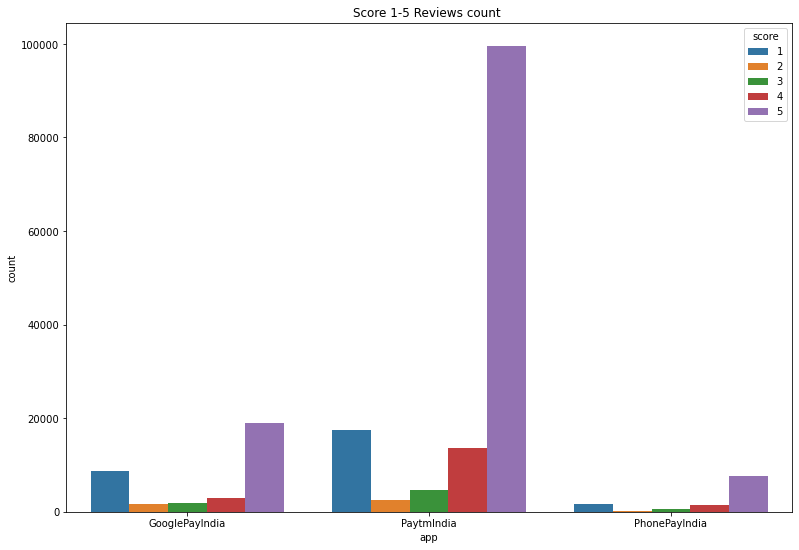

In [126]:
plt.figure(figsize=(13,9))
sns.barplot(x='app',y='count',data=A,hue='score')
plt.title('Score 1-5 Reviews count ')
plt.show()

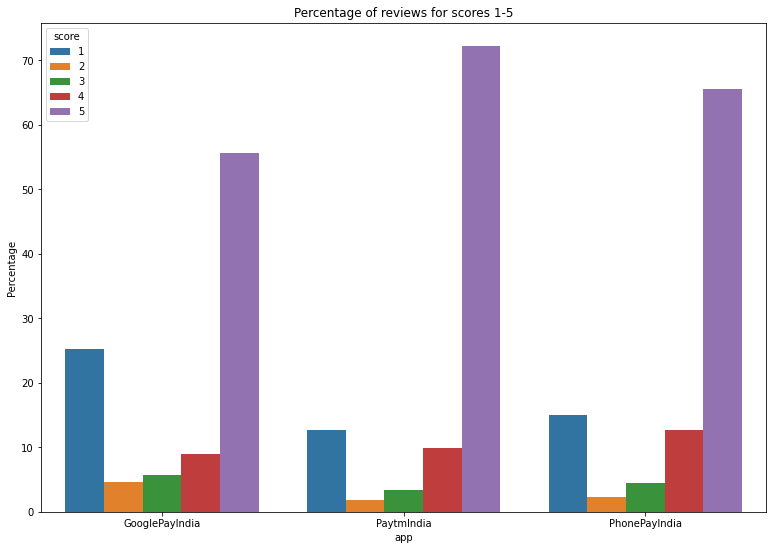

In [127]:
plt.figure(figsize=(13,9))
sns.barplot(x='app',y='Percentage',data=A,hue='score')
plt.title('Percentage of reviews for scores 1-5')
plt.show()